### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
location = "/home/labsuser/Desktop/Datasets/income_train.csv"

### READING DATA SETS

In [3]:
train_data = pd.read_csv("/home/labsuser/Desktop/Datasets/income_train.csv")
test_data = pd.read_csv("/home/labsuser/Desktop/Datasets/income_test.csv")
print("Training Data Details:")
print(train_data.shape)
print("Test Data Details:")
print(test_data.shape)


Training Data Details:
(9557, 143)
Test Data Details:
(23856, 142)


OBSERVATION: Test data has one column less than the training data column, and that column is "Target", which is obvious as it is output variable. 

### VISUALIZING DATA AND UNDERSTANDING THE TYPE OF DATA

In [4]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


### CHECKING MISSING VALUES  

In [6]:
missing_data = train_data.isnull().sum().to_frame()
missing_data = missing_data.sort_values(0 , ascending = False)
missing_data.head()

,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


So, now we need to treat these values. 
Lets start with SQBmeaned and meaneduc.

In [7]:
train_data[train_data['meaneduc'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,NaN,0,7,0,1,1,0,NaN,0,...,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,NaN,0,...,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,NaN,0,...,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,NaN,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,NaN,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4


Only 5 rows, so will not create much diff, 
so will fill the Nan values with Zero for now, will check later, if anything else can be done.

Considering v18q1,which indicates how many tablets the household owns , has 7342 rows empty. lets see in the documentation whether we have any related column.
So we found v18q, which indicates whether there's a tablet in the household.
Lets check the value of v18q when v18q1 is missing.

In [8]:
train_data[['v18q', 'v18q1']][:20]

,v18q,v18q1
0,0,NaN
1,1,1.0
2,0,NaN
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,0,NaN
8,0,NaN
9,0,NaN


OBSERVATION: We can see that when nan is present in v18q1, the value in v18q is zero. 
lets confirm it..!!

In [9]:
train_data["v18q"].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

In [10]:
train_data['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

So, the number of times Zero present in v18q is same as no of Nan values in v18q1.
Also, no zero is present in v18q1. So, replacing the nan values in v18q1 with zero. 
Also we can drop the v18q column, as this info is now stored in the v18q1 column too.

Now,v2a1 also has so many missing values.6860. 
It is monthly rent payment. Lets find the related Data columns. 
tipovivi1 =1 own and fully paid house
tipovivi2, =1 own, paying in installments. For this I need some kind of filter.
tipovivi3, =1 rented 
lets count tipovivi3 == 1.

In [11]:
train_data["tipovivi3"].value_counts()

0    7821
1    1736
Name: tipovivi3, dtype: int64

Only 1736 people are paying rent, lets see if we have any common data where tipovivi3 == 1 and
v2a1 is missing. if so, replace the value in v2a1 by tipovivi3 else 0. 

In [12]:
train_data[(train_data['tipovivi3']== 1) & (train_data['v2a1']== 'nan')]

/usr/local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


so we dont have any commom data, so replacing all the nan values by 0. :)

Now last column, rez_esc, Years behind in school, having missing values. 7928. 


In [13]:
train_data['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

write here explanation of why rez_esc is being replaced by zero.

### Replacing all values:

In [14]:
train_data['meaneduc'] = train_data['meaneduc'].fillna(0)
train_data['rez_esc']=train_data['rez_esc'].fillna(0)
train_data['v2a1']=train_data['v2a1'].fillna(0)
train_data['v18q1']=train_data['v18q1'].fillna(0)

SQBmeaned is just square of the meaneduc. So we can drop the one column (SQBmeaned). 
Dropping all the Squares column as they are providing the same data as other columns. 
I checked this thing in excel, not sure how to do this here in code.

In [15]:
train_data[['meaneduc', 'SQBmeaned']][:20]

,meaneduc,SQBmeaned
0,10.0,100.00
1,12.0,144.00
2,11.0,121.00
3,11.0,121.00
4,11.0,121.00
5,11.0,121.00
6,11.0,121.00
7,10.0,100.00
8,10.0,100.00
9,10.0,100.00


In [16]:
train_data.drop(["SQBescolari"], axis = 1, inplace = True)
train_data.drop(["SQBage"], axis = 1, inplace = True)
train_data.drop(["SQBhogar_total"], axis = 1, inplace = True)
train_data.drop(["SQBedjefe"], axis = 1, inplace = True)
train_data.drop(["SQBhogar_nin"], axis = 1, inplace = True)
train_data.drop(["SQBovercrowding"], axis = 1, inplace = True)
train_data.drop(["SQBdependency"], axis = 1, inplace = True)
train_data.drop(["SQBmeaned"], axis = 1, inplace = True)
train_data.drop(["agesq"], axis = 1, inplace = True)
train_data.drop(["v18q"], axis = 1, inplace = True)

dropping same columns in test data also. 

In [17]:
ids = test_data['Id']
test_data.drop(["SQBescolari"], axis = 1, inplace = True)
test_data.drop(["SQBage"], axis = 1, inplace = True)
test_data.drop(["SQBhogar_total"], axis = 1, inplace = True)
test_data.drop(["SQBedjefe"], axis = 1, inplace = True)
test_data.drop(["SQBhogar_nin"], axis = 1, inplace = True)
test_data.drop(["SQBovercrowding"], axis = 1, inplace = True)
test_data.drop(["SQBdependency"], axis = 1, inplace = True)
test_data.drop(["SQBmeaned"], axis = 1, inplace = True)
test_data.drop(["agesq"], axis = 1, inplace = True)
test_data.drop(["v18q"], axis = 1, inplace = True)
test_data.drop(["idhogar"], axis = 1, inplace = True)
test_data.drop(["Id"], axis = 1, inplace = True)

### Treating CATEGORICAL data:

In [18]:
train_data.columns[train_data.dtypes==object]

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In edjefe and edjefa,  yes=1 and no=0 , given in documentation. 
so we can do that. Cant convert Id and idhogar as all are unique values.
lets check dependency. 
Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64)
quite a number of yes and no are present. 
for No we can replace with 0 as no dependency.
For yes, we can replace with 1. 
As for all the columns with Yes in dependency have 1 in Squaredependency. 

Replacing Yes with 1 and No with 0 in dependency', 'edjefe', 'edjefa.

In [19]:
train_data.replace(('yes', 'no'), (1, 0), inplace=True)

In [20]:
test_data.replace(('yes', 'no'), (1, 0), inplace=True)

### PLOTTING SHOWING BIASES IN THE DATASET

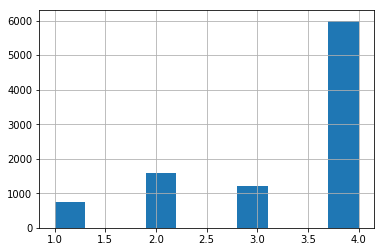

In [21]:
train_data['Target'].hist()

### CHECKING IF THERES A HOUSE WITHOUT FAMILY HEAD

In [22]:
group = train_data.groupby('idhogar')['parentesco1'].sum()
head_exists = group[group == 1]
head_doesntexist = group[group==0]
print(len(head_doesntexist))

15


So, thers are 15 families as such.

### NULL VALUES OF TARGET COLUMN

In [23]:
train_data['Target'].isnull().any().sum()

0

Nothing needs to be done. :) 

In [24]:
X=train_data.drop(['Id', 'idhogar', 'Target'], axis=1)
y=train_data['Target']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [26]:
train_data.shape

(9557, 133)

In [27]:
test_data.shape

(23856, 130)

In [28]:
train_data.columns[train_data.dtypes==object]

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)
gs.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [66]:
preds=gs.predict(X_test)


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

              precision    recall  f1-score   support

           1       0.93      0.80      0.86       208
           2       0.92      0.85      0.88       489
           3       0.96      0.72      0.82       365
           4       0.91      0.99      0.95      1806

    accuracy                           0.92      2868
   macro avg       0.93      0.84      0.88      2868
weighted avg       0.92      0.92      0.92      2868

[[ 166   14    0   28]
 [   9  414    7   59]
 [   2   17  261   85]
 [   2    6    4 1794]]
{'n_estimators': 59}
0.8963979102311693
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=59,
          

In [68]:
missing_data = test_data.isnull().sum().to_frame()
missing_data = missing_data.sort_values(0 , ascending = False)
missing_data.head()

,0
rez_esc,19653
v18q1,18126
v2a1,17403
meaneduc,31
hogar_mayor,0


In [69]:
test_data['rez_esc']=test_data['v18q1'].fillna(0)
test_data['v18q1']=test_data['v18q1'].fillna(0)
test_data['v2a1']=test_data['v18q1'].fillna(0)
test_data['meaneduc']=test_data['v18q1'].fillna(0)
test_data['hogar_mayor']=test_data['v18q1'].fillna(0)

In [70]:
test_predictions=gs.predict(test_data)
test_predictions[:5]


array([4, 4, 4, 4, 4])

In [72]:
submit=pd.DataFrame({'Id': ids, 'Target': test_predictions})
submit.to_csv('submit.csv', index=False)